<a href="https://colab.research.google.com/github/adanbiofisico01/new/blob/main/SIMPLER_original_model_U3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [12]:
from keras import regularizers

In [6]:
tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [8]:
# Cargar los datos
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [9]:
# Preprocesamiento de datos
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [11]:
# Dividir el conjunto de entrenamiento
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [13]:
# Diseñar la arquitectura de la red neuronal con regularización L2
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=keras.regularizers.l2(0.00001)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.00001)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00001)), # regularizacion L2
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Entrenar el modelo con regularización L2
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 257s 170ms/step - loss: 0.3999 - accuracy: 0.8609 - val_loss: 0.3049 - val_accuracy: 0.8977
Epoch 2/5
1500/1500 [==============================] - 231s 154ms/step - loss: 0.2728 - accuracy: 0.9095 - val_loss: 0.2715 - val_accuracy: 0.9145
Epoch 3/5
1500/1500 [==============================] - 219s 146ms/step - loss: 0.2222 - accuracy: 0.9341 - val_loss: 0.2989 - val_accuracy: 0.9099
Epoch 4/5
1500/1500 [==============================] - 218s 145ms/step - loss: 0.1889 - accuracy: 0.9490 - val_loss: 0.3001 - val_accuracy: 0.9164
Epoch 5/5
1500/1500 [==============================] - 210s 140ms/step - loss: 0.1604 - accuracy: 0.9625 - val_loss: 0.3199 - val_accuracy: 0.9141


In [16]:
import pandas as pd

In [17]:
# Crear un DataFrame de pandas con los datos de history
history_df = pd.DataFrame(history.history)

In [18]:
# Guardar el DataFrame en un archivo CSV
history_df.to_csv('history_L2_CR_0.00001_5_epocas_simple.csv', index=False)

In [19]:
from keras import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model

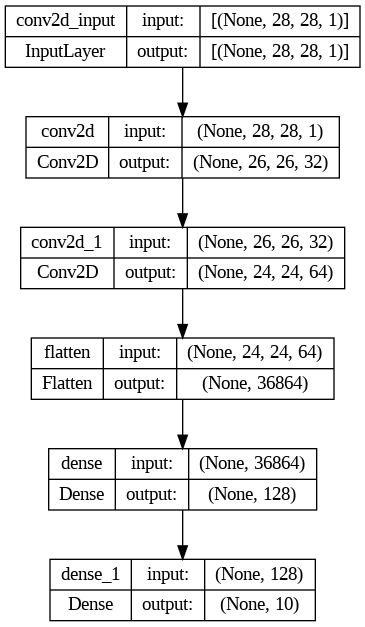

In [20]:
plot_model(model, 'net.png', show_shapes=True)

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Exactitud en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 10s 30ms/step - loss: 0.3469 - accuracy: 0.9087
Exactitud en el conjunto de prueba: 0.9086999893188477


In [23]:
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f'Exactitud en el conjunto de validacion: {test_accuracy}')

375/375 [==============================] - 11s 30ms/step - loss: 0.3199 - accuracy: 0.9141
Exactitud en el conjunto de validacion: 0.9140833616256714
